# Understanding Data

Merupakan salah satu tahapan penting dalam Knowledge Discovery in database (KDD) atau data maining yang merupakan langkah awal untuk memahami data secara mendalam sebelum melakukan analisis lebih lanjut karena nantinya akan memengaruhi keberhasilan seluruh proses data maining.

## Macam macam tipe data

Dalam **penambangan data (data mining)**, terdapat berbagai macam **tipe data** yang dapat digunakan untuk analisis. Berikut adalah beberapa jenis utama tipe data dalam data mining:

### 1. **Tipe Data Berdasarkan Sifatnya**
   - **Numerik (Numerical Data)**  
     Data berupa angka yang bisa dihitung dan memiliki makna kuantitatif.  
     Contoh:  
     - **Diskrit (Discrete)** → Jumlah anak dalam keluarga (0, 1, 2, 3, …)  
     - **Kontinu (Continuous)** → Berat badan, suhu, tinggi badan  

   - **Kategorikal (Categorical Data)**  
     Data berbentuk kategori atau label, bukan angka kuantitatif.  
     Contoh:  
     - **Nominal** → Jenis kelamin (Pria/Wanita), warna mata (Hitam, Coklat)  
     - **Ordinal** → Tingkat pendidikan (SD, SMP, SMA, S1), skala kepuasan (Buruk, Sedang, Baik)  

   - **Boolean**  
     Data yang hanya memiliki dua nilai, sering digunakan dalam keputusan biner.  
     Contoh: Ya/Tidak, True/False  

### 2. **Tipe Data Berdasarkan Struktur**
   - **Data Terstruktur (Structured Data)**  
     Data yang disimpan dalam format tabel atau basis data relasional dengan kolom dan baris.  
     Contoh: Data transaksi di database SQL  

   - **Data Semi-Terstruktur (Semi-Structured Data)**  
     Data yang tidak sepenuhnya dalam format tabel, tetapi memiliki struktur tertentu seperti XML atau JSON.  
     Contoh: Data dari API dalam format JSON  

   - **Data Tidak Terstruktur (Unstructured Data)**  
     Data yang tidak memiliki format tetap, seperti teks bebas, gambar, video, atau suara.  
     Contoh: Postingan media sosial, email, rekaman suara  

### 3. **Tipe Data Berdasarkan Sumbernya**
   - **Data Transaksional** → Data dari catatan transaksi, seperti pembelian pelanggan di toko.  
   - **Data Sensor / IoT** → Data dari perangkat sensor, seperti suhu atau kecepatan angin.  
   - **Data Spasial** → Data geografis atau peta, seperti koordinat lokasi.  
   - **Data Multimedia** → Data dalam bentuk gambar, video, dan audio.  

### 4. **Tipe Data Berdasarkan Representasi dalam Data Mining**
   - **Time Series Data** → Data yang dikumpulkan berdasarkan waktu (misalnya harga saham harian).  
   - **Graph Data** → Data berbentuk graf seperti jaringan sosial (misalnya hubungan antar pengguna di Facebook).  
   - **Text Data** → Data berbentuk teks, sering digunakan dalam text mining.  

Setiap tipe data ini digunakan dalam metode **data mining** yang berbeda, seperti klasifikasi, klasterisasi, regresi, dan lainnya. 🚀



## Pengunpulan data

Dalam tahap ini kami sudah mengumpulkan data dan meletakkan di aiven.io yang merupakan sumber data dari data base yang berbeda dalam tahapan pengumpulan data harus dipastikan bahwa semua data harus relevan sesuai dengan tujuan analisis.

### Install Package untuk MySQL dan PosgreSQL

In [ ]:
!pip install pymysql


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
!pip install psycopg2-binary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 50.3 MB/s eta 0:00:00


In [ ]:
!pip install pandas tabulate


### Koneksi ke Database Mysql dan PosgreSQL melalui dari aiven.io

#### Koneksi ke PosgreSQL dan menampilkan datanya


In [ ]:
import psycopg2
import pandas as pd
from tabulate import tabulate

# Koneksi ke database PostgreSQL
PG_HOST = "pg-2e640ec9-rahmatullayli123-d892.h.aivencloud.com"
PG_PORT = "21028"
PG_NAME = "defaultdb"
PG_USER = "avnadmin"
PG_PASS = "AVNS_93PD-YH-4mlx5toeFU3"

try:
    # Membuat koneksi
    conn = psycopg2.connect(
        host=PG_HOST,
        port=PG_PORT,
        dbname=PG_NAME,
        user=PG_USER,
        password=PG_PASS,
        sslmode="require"
    )
    cur = conn.cursor()

    # Menjalankan query (mengurutkan berdasarkan ID secara ascending)
    cur.execute("SELECT * FROM sepal ORDER BY id ASC;")
    rows = cur.fetchall()

    # Mengambil nama kolom
    col_names = [desc[0] for desc in cur.description]

    # Mengubah hasil query menjadi DataFrame
    df = pd.DataFrame(rows, columns=col_names)

    # Menampilkan hanya 3 data awal dan 3 data akhir dengan "..." di tengah
    if len(df) > 6:
        df_display = pd.concat([df.head(3), pd.DataFrame([["..."] * len(col_names)], columns=col_names), df.tail(3)])
    else:
        df_display = df  # Jika data kurang dari 6, tampilkan semuanya

    print(tabulate(df_display, headers="keys", tablefmt="psql", showindex=False))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi
    if cur:
        cur.close()
    if conn:
        conn.close()


+------+----------------+----------------+---------------+
| id   | class          | sepal_length   | sepal_width   |
|------+----------------+----------------+---------------|
| 1    | Iris-setosa    | 5.1            | 3.5           |
| 2    | Iris-setosa    | 4.9            | 3.0           |
| 3    | Iris-setosa    | 4.7            | 3.2           |
| ...  | ...            | ...            | ...           |
| 148  | Iris-virginica | 6.5            | 3.0           |
| 149  | Iris-virginica | 6.2            | 3.4           |
| 150  | Iris-virginica | 5.9            | 3.0           |
+------+----------------+----------------+---------------+


#### Koneksi ke MySQL dan menampilkan datanya

In [ ]:
import pymysql
import pandas as pd
from tabulate import tabulate

# Konfigurasi koneksi ke database MySQL
DB_HOST = "mysql-309c3d6e-mysqlirispendata7.h.aivencloud.com"
DB_PORT = 26958
DB_NAME = "iris_mysql"
DB_USER = "avnadmin"
DB_PASS = "AVNS_krNRWz9TOsAjruawhm3"

try:
    # Membuat koneksi ke MySQL
    conn = pymysql.connect(
        host=DB_HOST,
        port=DB_PORT,
        user=DB_USER,
        password=DB_PASS,
        database=DB_NAME,
        cursorclass=pymysql.cursors.DictCursor  # Mengembalikan hasil sebagai dictionary
    )
    cur = conn.cursor()

    # Menjalankan query SQL
    query = "SELECT * FROM petal ORDER BY id ASC;"  # Sesuaikan dengan nama tabel
    cur.execute(query)
    rows = cur.fetchall()

    # Jika tabel kosong
    if not rows:
        print("Tabel kosong, tidak ada data untuk ditampilkan.")
    else:
        # Mengubah hasil query menjadi DataFrame pandas
        df = pd.DataFrame(rows)

        # Menampilkan 3 data awal, titik-titik di tengah, dan 3 data akhir
        df_selected = pd.concat([df.head(3), pd.DataFrame([["..."] * len(df.columns)], columns=df.columns), df.tail(3)])

        # Menampilkan tabel dengan format psql
        print(tabulate(df_selected, headers="keys", tablefmt="psql", showindex=False))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi ke database
    if cur:
        cur.close()
    if conn:
        conn.close()


+------+----------------+----------------+---------------+
| id   | class          | petal_length   | petal_width   |
|------+----------------+----------------+---------------|
| 1    | Iris-setosa    | 1.4            | 0.2           |
| 2    | Iris-setosa    | 1.4            | 0.2           |
| 3    | Iris-setosa    | 1.3            | 0.2           |
| ...  | ...            | ...            | ...           |
| 148  | Iris-virginica | 5.2            | 2.0           |
| 149  | Iris-virginica | 5.4            | 2.3           |
| 150  | Iris-virginica | 5.1            | 1.8           |
+------+----------------+----------------+---------------+


## Sampling data

Sampling data digunakan untuk memahami subset data tanpa harus memproses seluruh dataset disi.pada tahap ini samplng digunakan dengan mengelompokkan data berdasarkan kelasnya dengan warna yang berbeda yaitu Iris-sentosa berwarna biru Iris-versicolor berwarna merah dan Iris-virginica berwarna hijau hal ini salahsatunya bertujuan untuk memudahkan visuakisasi

## Profiling data

merupakan proses membuat ringkasan tentang setiap variable dalam dataset,termasuk tipe data dan meproses memeriksa, memahami, dan menganalisis struktur serta kualitas data sebelum digunakan dalam analisis lebih lanjut.



### menarik data base dari PosgreSql dan Mysql menjadi 1 tabel

pada saat ini sekaligus mengecek apakah terdapat mising value dan ketidak konsistenan ketika data digabungkan

In [ ]:
import psycopg2
import pymysql
import pandas as pd
from tabulate import tabulate

# Koneksi ke database PostgreSQL
PG_HOST = "pg-2e640ec9-rahmatullayli123-d892.h.aivencloud.com"
PG_PORT = "21028"
PG_NAME = "defaultdb"
PG_USER = "avnadmin"
PG_PASS = "AVNS_93PD-YH-4mlx5toeFU3"

# Konfigurasi koneksi ke database MySQL
DB_HOST = "mysql-309c3d6e-mysqlirispendata7.h.aivencloud.com"
DB_PORT = 26958
DB_NAME = "iris_mysql"
DB_USER = "avnadmin"
DB_PASS = "AVNS_krNRWz9TOsAjruawhm3"

try:
    # Koneksi PostgreSQL
    conn = psycopg2.connect(
        host=PG_HOST, port=PG_PORT, dbname=PG_NAME,
        user=PG_USER, password=PG_PASS, sslmode="require"
    )
    cur = conn.cursor()

    # Ambil data dari PostgreSQL (id, class, sepal_length, sepal_width)
    cur.execute("SELECT * FROM sepal;")  # Sesuaikan tabel
    pg_rows = cur.fetchall()
    pg_columns = [desc[0] for desc in cur.description]
    pg_df = pd.DataFrame(pg_rows, columns=pg_columns)

    # Koneksi MySQL
    mysql_conn = pymysql.connect(
        host=DB_HOST, port=DB_PORT, user=DB_USER,
        password=DB_PASS, database=DB_NAME,
        cursorclass=pymysql.cursors.DictCursor
    )
    mysql_cur = mysql_conn.cursor()

    # Ambil data dari MySQL (ID, Petal Length, Petal Width)
    mysql_cur.execute("SELECT * FROM petal;")  # Sesuaikan tabel
    mysql_rows = mysql_cur.fetchall()
    mysql_df = pd.DataFrame(mysql_rows)

    # Menggabungkan kedua tabel berdasarkan ID
    combined_df = pd.merge(pg_df, mysql_df, on=["id", "class"], how="inner")  # Inner join

    # Mengatur urutan kolom agar class berada di sebelah ID
    ordered_columns = ["id", "class", "sepal_length", "sepal_width", "petal_length", "petal_width"]
    combined_df = combined_df[ordered_columns]

    # Mengurutkan data berdasarkan ID
    combined_df = combined_df.sort_values(by="id").reset_index(drop=True)

    # Menampilkan 3 data awal, tanda "..." di tengah, dan 3 data akhir
    df_selected = pd.concat([
        combined_df.head(3),
        pd.DataFrame([["..."] * len(combined_df.columns)], columns=combined_df.columns),
        combined_df.tail(3)
    ])



    # Menampilkan hasil dalam format tabel
    print(tabulate(df_selected, headers="keys", tablefmt="psql", showindex=False))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi database
    if cur:
        cur.close()
    if conn:
        conn.close()
    if mysql_cur:
        mysql_cur.close()
    if mysql_conn:
        mysql_conn.close()


+------+----------------+----------------+---------------+----------------+---------------+
| id   | class          | sepal_length   | sepal_width   | petal_length   | petal_width   |
|------+----------------+----------------+---------------+----------------+---------------|
| 1    | Iris-setosa    | 5.1            | 3.5           | 1.4            | 0.2           |
| 2    | Iris-setosa    | 4.9            | 3.0           | 1.4            | 0.2           |
| 3    | Iris-setosa    | 4.7            | 3.2           | 1.3            | 0.2           |
| ...  | ...            | ...            | ...           | ...            | ...           |
| 148  | Iris-virginica | 6.5            | 3.0           | 5.2            | 2.0           |
| 149  | Iris-virginica | 6.2            | 3.4           | 5.4            | 2.3           |
| 150  | Iris-virginica | 5.9            | 3.0           | 5.1            | 1.8           |
+------+----------------+----------------+---------------+----------------+-----

## Visualisasi Data

Visualisasi data dalam analisis dataset digunakan ketika kita ingin memahami, mengeksplorasi, dan menyajikan pola dalam data. visualisasi membantu dalam mendeteksi pola, tren, hubungan antar fitur, serta distribusi data menampilkan visualisasi data dengan diagram membantu dalam mempercepat analisis data.



## Korelasi dan Asosiasi

merupakan proses menghitung koefisien korelasi untuk melihat hubungan linier antar variable yang bertujuan untuk menganalisis hubungan antar variabel dalam dataset.

## Eksplorasi Data

Eksplorasi data adalah proses awal dalam analisis data untuk memahami karakteristik, distribusi, dan pola dalam dataset sehingga menghasilkan deskripsi statistik seperti mean, median, modus,standar deviasi,minimun, dan maskimum dengan menggunakan visualisasi data seperti grafik histogram scatter plot untuk melihat pola atau trend awal


### Menapilkan data dalam bentuk diagram

Proses merupakan proses untuk menampilkan data menjadi diagram sekaligus menetukan median mean dan modus dari setiap label atau fiturnya dan membedakan warna diagram menyesuaikan dengan banyaknya class yang ada.

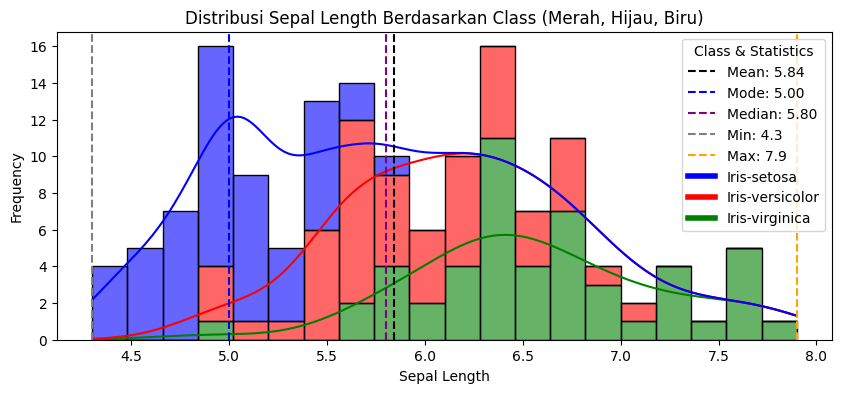

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan nama kolom benar
sepal_length_col = "sepal_length"  # Sesuaikan dengan nama kolom yang benar
class_col = "class"  # Sesuaikan dengan nama kolom yang benar

# Tetapkan warna khusus untuk setiap class
custom_palette = {
    "Iris-setosa": "blue",
    "Iris-versicolor": "red",
    "Iris-virginica": "green"
}

# Hitung statistik dasar
mean_sepal_length = combined_df[sepal_length_col].mean()
median_sepal_length = combined_df[sepal_length_col].median()
min_sepal_length = combined_df[sepal_length_col].min()
max_sepal_length = combined_df[sepal_length_col].max()
mode_sepal_length = combined_df[sepal_length_col].mode()[0]

# Buat plot distribusi dengan warna yang sudah ditentukan
plt.figure(figsize=(10, 4))
hist = sns.histplot(
    data=combined_df,
    x=sepal_length_col,
    hue=class_col,
    bins=20,
    kde=True,
    alpha=0.6,
    palette=custom_palette,
    multiple="stack"
)

# Tambahkan garis rata-rata, median, min, dan max
plt.axvline(mean_sepal_length, color="black", linestyle="--", label=f"Mean: {mean_sepal_length:.2f}")
plt.axvline(mode_sepal_length, color="blue", linestyle="--", label=f"Mode: {mode_sepal_length:.2f}")
plt.axvline(median_sepal_length, color="purple", linestyle="--", label=f"Median: {median_sepal_length:.2f}")
plt.axvline(min_sepal_length, color="gray", linestyle="--", label=f"Min: {min_sepal_length:.1f}")
plt.axvline(max_sepal_length, color="orange", linestyle="--", label=f"Max: {max_sepal_length:.1f}")

# Ambil legenda otomatis dari histogram
handles, labels = hist.get_legend_handles_labels()

# Tambahkan legenda untuk warna kelas
for class_name, color in custom_palette.items():
    handles.append(plt.Line2D([0], [0], color=color, lw=4))
    labels.append(class_name)

# Tambahkan label
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.title("Distribusi Sepal Length Berdasarkan Class (Merah, Hijau, Biru)")
plt.legend(handles=handles, labels=labels, title="Class & Statistics", loc="upper right")

# Tampilkan plot
plt.show()


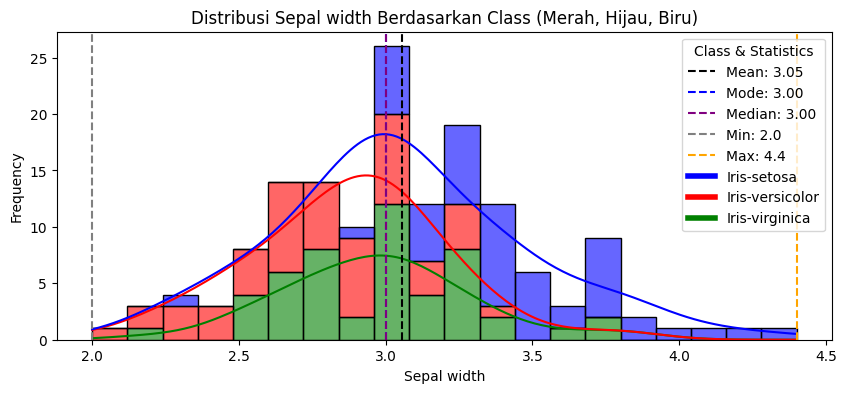

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan nama kolom benar
sepal_length_col = "sepal_width"  # Sesuaikan dengan nama kolom yang benar
class_col = "class"  # Sesuaikan dengan nama kolom yang benar

# Tetapkan warna khusus untuk setiap class
custom_palette = {
    "Iris-setosa": "blue",
    "Iris-versicolor": "red",
    "Iris-virginica": "green"
}

# Hitung statistik dasar
mean_sepal_length = combined_df[sepal_length_col].mean()
median_sepal_length = combined_df[sepal_length_col].median()
min_sepal_length = combined_df[sepal_length_col].min()
max_sepal_length = combined_df[sepal_length_col].max()
mode_sepal_length = combined_df[sepal_length_col].mode()[0]

# Buat plot distribusi dengan warna yang sudah ditentukan
plt.figure(figsize=(10, 4))
hist = sns.histplot(
    data=combined_df,
    x=sepal_length_col,
    hue=class_col,
    bins=20,
    kde=True,
    alpha=0.6,
    palette=custom_palette,
    multiple="stack"
)

# Tambahkan garis rata-rata, median, min, dan max
plt.axvline(mean_sepal_length, color="black", linestyle="--", label=f"Mean: {mean_sepal_length:.2f}")
plt.axvline(mode_sepal_length, color="blue", linestyle="--", label=f"Mode: {mode_sepal_length:.2f}")
plt.axvline(median_sepal_length, color="purple", linestyle="--", label=f"Median: {median_sepal_length:.2f}")
plt.axvline(min_sepal_length, color="gray", linestyle="--", label=f"Min: {min_sepal_length:.1f}")
plt.axvline(max_sepal_length, color="orange", linestyle="--", label=f"Max: {max_sepal_length:.1f}")

# Ambil legenda otomatis dari histogram
handles, labels = hist.get_legend_handles_labels()

# Tambahkan legenda untuk warna kelas
for class_name, color in custom_palette.items():
    handles.append(plt.Line2D([0], [0], color=color, lw=4))
    labels.append(class_name)

# Tambahkan label
plt.xlabel("Sepal width")
plt.ylabel("Frequency")
plt.title("Distribusi Sepal width Berdasarkan Class (Merah, Hijau, Biru)")
plt.legend(handles=handles, labels=labels, title="Class & Statistics", loc="upper right")

# Tampilkan plot
plt.show()


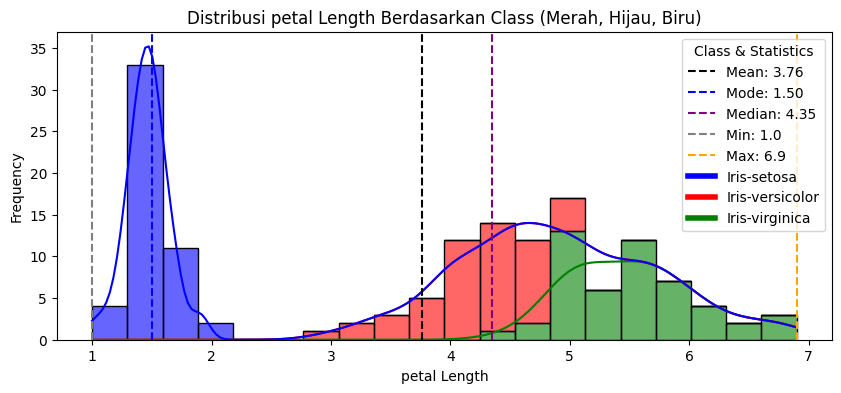

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan nama kolom benar
sepal_length_col = "petal_length"  # Sesuaikan dengan nama kolom yang benar
class_col = "class"  # Sesuaikan dengan nama kolom yang benar

# Tetapkan warna khusus untuk setiap class
custom_palette = {
    "Iris-setosa": "blue",
    "Iris-versicolor": "red",
    "Iris-virginica": "green"
}

# Hitung statistik dasar
mean_sepal_length = combined_df[sepal_length_col].mean()
median_sepal_length = combined_df[sepal_length_col].median()
min_sepal_length = combined_df[sepal_length_col].min()
max_sepal_length = combined_df[sepal_length_col].max()
mode_sepal_length = combined_df[sepal_length_col].mode()[0]

# Buat plot distribusi dengan warna yang sudah ditentukan
plt.figure(figsize=(10, 4))
hist = sns.histplot(
    data=combined_df,
    x=sepal_length_col,
    hue=class_col,
    bins=20,
    kde=True,
    alpha=0.6,
    palette=custom_palette,
    multiple="stack"
)

# Tambahkan garis rata-rata, median, min, dan max
plt.axvline(mean_sepal_length, color="black", linestyle="--", label=f"Mean: {mean_sepal_length:.2f}")
plt.axvline(mode_sepal_length, color="blue", linestyle="--", label=f"Mode: {mode_sepal_length:.2f}")
plt.axvline(median_sepal_length, color="purple", linestyle="--", label=f"Median: {median_sepal_length:.2f}")
plt.axvline(min_sepal_length, color="gray", linestyle="--", label=f"Min: {min_sepal_length:.1f}")
plt.axvline(max_sepal_length, color="orange", linestyle="--", label=f"Max: {max_sepal_length:.1f}")

# Ambil legenda otomatis dari histogram
handles, labels = hist.get_legend_handles_labels()

# Tambahkan legenda untuk warna kelas
for class_name, color in custom_palette.items():
    handles.append(plt.Line2D([0], [0], color=color, lw=4))
    labels.append(class_name)

# Tambahkan label
plt.xlabel("petal Length")
plt.ylabel("Frequency")
plt.title("Distribusi petal Length Berdasarkan Class (Merah, Hijau, Biru)")
plt.legend(handles=handles, labels=labels, title="Class & Statistics", loc="upper right")

# Tampilkan plot
plt.show()


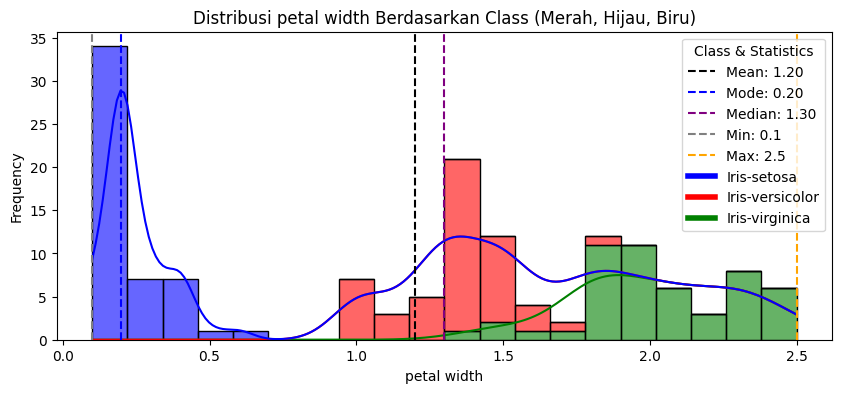

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan nama kolom benar
sepal_length_col = "petal_width"  # Sesuaikan dengan nama kolom yang benar
class_col = "class"  # Sesuaikan dengan nama kolom yang benar

# Tetapkan warna khusus untuk setiap class
custom_palette = {
    "Iris-setosa": "blue",
    "Iris-versicolor": "red",
    "Iris-virginica": "green"
}

# Hitung statistik dasar
mean_sepal_length = combined_df[sepal_length_col].mean()
median_sepal_length = combined_df[sepal_length_col].median()
min_sepal_length = combined_df[sepal_length_col].min()
max_sepal_length = combined_df[sepal_length_col].max()
mode_sepal_length = combined_df[sepal_length_col].mode()[0]

# Buat plot distribusi dengan warna yang sudah ditentukan
plt.figure(figsize=(10, 4))
hist = sns.histplot(
    data=combined_df,
    x=sepal_length_col,
    hue=class_col,
    bins=20,
    kde=True,
    alpha=0.6,
    palette=custom_palette,
    multiple="stack"
)

# Tambahkan garis rata-rata, median, min, dan max
plt.axvline(mean_sepal_length, color="black", linestyle="--", label=f"Mean: {mean_sepal_length:.2f}")
plt.axvline(mode_sepal_length, color="blue", linestyle="--", label=f"Mode: {mode_sepal_length:.2f}")
plt.axvline(median_sepal_length, color="purple", linestyle="--", label=f"Median: {median_sepal_length:.2f}")
plt.axvline(min_sepal_length, color="gray", linestyle="--", label=f"Min: {min_sepal_length:.1f}")
plt.axvline(max_sepal_length, color="orange", linestyle="--", label=f"Max: {max_sepal_length:.1f}")

# Ambil legenda otomatis dari histogram
handles, labels = hist.get_legend_handles_labels()

# Tambahkan legenda untuk warna kelas
for class_name, color in custom_palette.items():
    handles.append(plt.Line2D([0], [0], color=color, lw=4))
    labels.append(class_name)

# Tambahkan label
plt.xlabel("petal width")
plt.ylabel("Frequency")
plt.title("Distribusi petal width Berdasarkan Class (Merah, Hijau, Biru)")
plt.legend(handles=handles, labels=labels, title="Class & Statistics", loc="upper right")

# Tampilkan plot
plt.show()


## Indentifikasi Masalah Data

merupakan proses memahami kualitas data dan memastikan bahwa data yang akan kita analisis atau gunakan dalam model machine learning sudah bersih, lengkap, dan sesuai format yang diharapkan. Hal yang perlu diperhatikan adalah:

- Missing Values: Menemukan data yang hilang atau tidak lengkap.
- Outliers: Mendeteksi nilai-nilai ekstrem yang mungkin merupakan kesalahan atau anomali.
- Duplikasi Data: Mengidentifikasi baris atau entri yang duplikat.
- Inkonsistensi: Memeriksa apakah ada ketidaksesuaian dalam format atau nilai data.

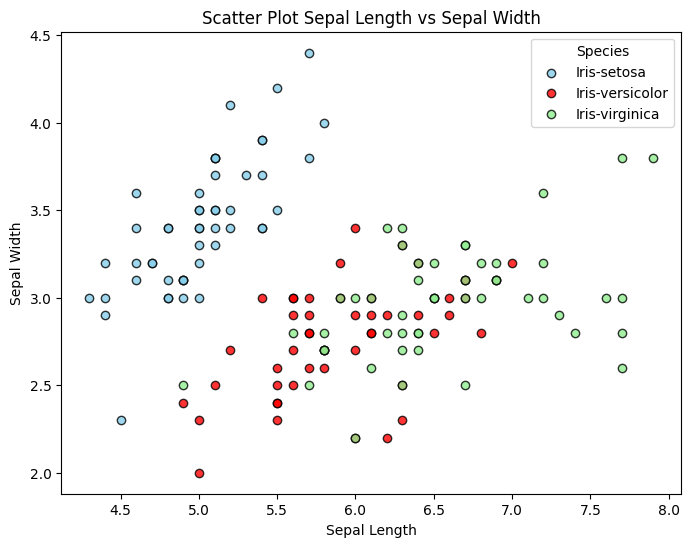

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan nama kolom sesuai
x_col = "sepal_length"
y_col = "sepal_width"
class_col = "class"

# Warna sesuai dengan gambar yang diberikan
colors = {"Iris-setosa": "skyblue", "Iris-versicolor": "red", "Iris-virginica": "lightgreen"}

plt.figure(figsize=(8, 6))

# Scatter plot dengan warna berdasarkan kelas
for species, color in colors.items():
    subset = combined_df[combined_df[class_col] == species]
    plt.scatter(subset[x_col], subset[y_col], label=species, color=color, alpha=0.8, edgecolors="black")

# Label sumbu
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Scatter Plot Sepal Length vs Sepal Width")

# Tambahkan legenda
plt.legend(title="Species")

# Tampilkan plot
plt.show()


## Validasi data

Validasi data dilakukan untuk memastikan bahwa data yang digunakan bersih, lengkap, dan sesuai sebelum dianalisis atau divisualisasikan dan memastikan apakah data memcerminkan realitas atau fenomena yang ingin dipelajari